In [33]:
# генератор псевдослучайной равномернораспределенной величины
import random
def gen():
    arr = [] 
    a = 630360016
    m = 2147483647
    n = 10
    for i in range(n):
        x = random.randint(1000000000, 1500000000)
        xx = a*x % m
        y = xx/m
        arr.append(y)
    return arr

In [34]:
# последовательность интервалов по заданному ряду распределения 
def intervals(xi, pi):
    y = {}
    x = []
    x.append(0) 
    s = 0
    for i in range(len(pi)-1):
        s = s + pi[i]
        x.append(s)
        y[xi[i]] = [x[i],x[i+1]]   
    y[xi[len(xi)-1]] = [x[len(x)-1], 1]
    return y

In [35]:
# ключ словаря по значению
def get_key(val, y): 
    for key, value in y.items(): 
         if val == value: 
             return key
    return "key doesn't exist"

In [36]:
# генератор дискретной случайной величины
def gendis(xi, pi):
    y = intervals(xi, pi)
    x = []
    arr = []
    l = 0
    for k in range(1000):
        arr.append(gen()[0]) 
    for i in range(len(arr)):
        for j in y:
            if arr[i] <= y[j][1] and arr[i] >= y[j][0]:
                x.append(get_key(y[j], y))
        if len(x) == 1000:
            break
    return x

In [37]:
# вероятность распределения по закону Пуассона
import math
def p(xi, l):
    ll = math.exp(-l)
    pi = []
    for i in range(len(xi)):
        pi.append(round(l**xi[i]*ll/math.factorial(xi[i]),5))
    return pi

In [38]:
# Мат. ожидание
def expectedV(x):
    s = sum(x)
    return s/len(x)

In [39]:
# дисперсия
def disp(x):
    s, ss = 0.0, 0.0
    for k in x:
        s += (k - expectedV(x))**2
    ss = s/(len(x)-1)
    return (ss)

In [40]:
# Корреляция
def cor(x):
    n = len(x)
    max_j = 20
    k = [0] * max_j
    for j in range(1, max_j):
        k[j] = sum([(x[i] - expectedV(x)) * (x[i + j] - expectedV(x)) for i in range(n-j)]) / (n-j)
    p = [float(elem)/disp(x) for elem in k]
    return p

In [41]:
# доверительный интервал
import math
def conf_interv(x):
    m = [expectedV(x) - 1.96*math.sqrt(disp(x))/math.sqrt(len(x)), expectedV(x) + 1.96*math.sqrt(disp(x))/math.sqrt(len(x))]
    return m

In [42]:
# график корреляции
def cor_chart(c, color):
    fig = plt.figure(figsize=(5,5))
    plt.scatter(list(range(1, len(c)+1)), c, color=color)
    plt.ylabel('значения корреляционной функции')
    plt.xlabel('номера значений')
    plt.title('График корреляции')

In [43]:
# набор координат для графика частоты появления сл. вел.
import collections
def get_bars(x):
    n = 1000
    c = dict(collections.Counter(x[0:n]))
    yy = list(c.values())
    xx = list(c.keys())
    return (xx, yy)
    

In [44]:
# график распределения случайной величины
from matplotlib import pyplot as plt
def chart(x, color):
    xx = []
    yy = []
    for i in range(len(x) - 1):
        xx.append(x[i])
        yy.append(x[i+1])
    fig = plt.figure(figsize=(5,5))
    plt.scatter(xx,yy, color = color)

In [47]:
# график частоты появления случайной величины
def chart_bars(x, color): #color - str type   
    n = 1000
    xx, yy = get_bars(x)
    fig = plt.figure(figsize=(5,5))
    plt.bar(xx, yy, align='center', width = 0.5, color = color)
    plt.xticks(xx)
    plt.ylabel('частота появления')
    plt.xlabel('значения случайной величины')
    plt.title('График частоты появления случайной величины')

Случайная дискретная величина Xi:  [4, 5, 1, 2, 5, 4, 4, 4, 10, 5, 7, 7, 2, 5, 4, 3, 4, 6, 5] 

i =  1000 

Мат.ожидание =  5.027 

Дисперсия =  5.509780780780795 

Доверительный интервал =  [4.88151332072163, 5.172486679278371] 



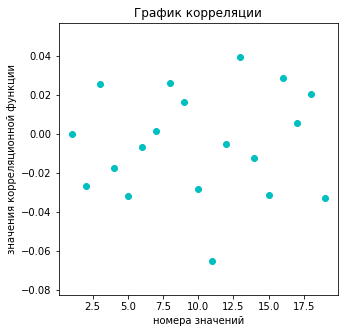

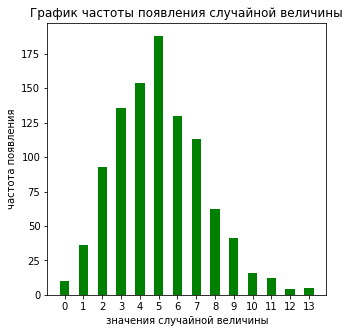

In [48]:
# моделирование случайной дискретной величины по закону Пуассона
# метод обратных функций
l = 5 #лямда
xi = [i for i in range (0, 19)]

pi = p(xi,l)
x2 = gendis(xi, pi)
mat2 = expectedV(x2)
d2 = disp(x2)
cr2 = cor(x2)
m2 = conf_interv(x2)

print('Случайная дискретная величина Xi: ', x2[0:19], '\n')
print('i = ',len(x2), '\n')
print('Мат.ожидание = ', mat2, '\n')
print('Дисперсия = ', d2, '\n')
print('Доверительный интервал = ', m2, '\n')

cor_chart(cr2[0:19], 'c')
chart_bars(x2, 'g')